# Ttianic Survivor Dataset

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_path = '../Data/Titanic/train.csv'

titanic = pd.read_csv(data_path, index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Things to note.

* Age is not complete
* Cabin only has 200 datapoints
* Embarked is missing two datapoints
* Everything else is complete

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


For the survived column, 0 means the person died and 1 means they lived. As can be seen below, more people died than lived.

In [4]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Age is incomplete
* Mean age is around 30 with most being between 20 and 38
* Describe says someone paid 0 for ticket. Interesthing thing to check on
* 0.42 is a very weird description of age, most would put down 1 or 6 months. Why is this 0.42?

In [5]:
titanic[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Mostly men aboard the Titanic

In [6]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Ticket doesn't seem to be a useful column here. Doesn't seem to be standardized in a usable way.

In [7]:
titanic['Ticket'].value_counts()

347082                7
CA. 2343              7
1601                  7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
PC 17757              4
113781                4
4133                  4
17421                 4
347077                4
113760                4
LINE                  4
W./C. 6608            4
2666                  4
349909                4
19950                 4
345773                3
363291                3
29106                 3
371110                3
13502                 3
F.C.C. 13529          3
239853                3
SC/Paris 2123         3
230080                3
347742                3
248727                3
                     ..
226875                1
113056                1
350047                1
7553                  1
347468                1
SOTON/OQ 392086       1
65306                 1
349208                1
19988                 1
PC 17612              1
SC/AH 3085      

S = Southampton
C = Cherbourg
Q = Queenstown/Cobh

In [8]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Vast majority of passengers travelled alone.

Parch is describing the number of parents/children aboard the titanic.
SibSp is describing the number of siblings/spouses aboard.

In [9]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Things to note at this point.

* Age and Sex are very likely related to survival. 'Women and Children first.'
* Age isn't complete so something ust be done there
* Ticket seems completely useless
* Cabin isn't complete nor does it seem useful anyway
* Name isn't important but can extract title from Name, could be useful
* Look into maybe changing Age and Fare into a range rather than just a number. Check with and without to see if it helps

In [11]:
titanic[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
titanic[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


There does seem to be some correlation between survival and where a passenger embarked. At the very least for passengers from Cherbourg.

In [13]:
titanic[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Investigation on survival and age groups.

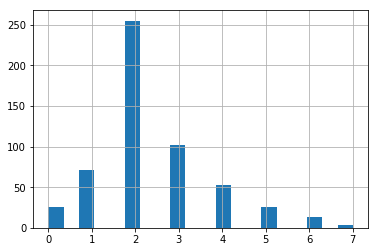

In [48]:
dead = titanic[titanic['Survived'] == 0]
dead['Age'].hist(bins = 20);

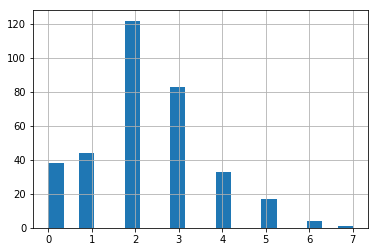

In [49]:
alive = titanic[titanic['Survived'] == 1]
alive['Age'].hist(bins = 20);

## Dropping Some Features

Some features just don't have any relevance from the investigation. Ticket and Cabin do not seem relevant because either there is no real corellation I can think of or because the data is incomplete. I am just going to get rid of them.

In [16]:
print(titanic.shape)
titanic = titanic.drop(['Ticket', 'Cabin'], axis = 1)
print(titanic.shape)

(891, 11)
(891, 9)


## Feature Creation

At this point, I think it would be worthwhile trying to create an age band feature as well as investigating the possibility of creating a Title feature.

### Age Band

Here I split age into various age bands and check to see if it works out. Each age band is a gap of 10 years.

I should fill in the missing values before doing this however.

In [17]:
new_age = titanic.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.fillna(x.median()))
new_age.isnull().values.any()

False

In [18]:
titanic['Age'] = new_age.values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = [0, 1, 2, 3, 4, 5, 6, 7]

titanic['AgeBand'] = pd.cut(titanic['Age'], bins = bins, labels = labels)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


In [20]:
titanic[['AgeBand', 'Survived']].groupby('AgeBand').mean()

,Survived
AgeBand,
0,0.593750
1,0.382609
2,0.323607
3,0.448649
4,0.383721
5,0.404762
6,0.235294
7,0.200000


In [61]:
titanic[titanic['AgeBand'] == 3]['Age'].describe()

KeyError: 'AgeBand'

In [22]:
titanic[titanic['AgeBand'] == 7]['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

In [23]:
dead = titanic[titanic['Survived'] == 0]
dead['AgeBand'].hist(bins = 8);

In [24]:
dead['Age'].hist(bins = 8);

In [25]:
titanic[titanic['Age'] > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
PassengerId,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C,7
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q,7
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,C,7
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S,7
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,S,7


In [26]:
titanic[(titanic['Age'] > 60) & (titanic['Age'] < 70)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
PassengerId,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,S,6
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,C,6
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,33.5000,S,6
253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,26.5500,S,6
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,S,6
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,Q,6
327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,6.2375,S,6
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S,6
457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,26.5500,S,6


In [50]:
alive = titanic[titanic['Survived'] == 1]
alive['AgeBand'].hist(bins = 8);

KeyError: 'AgeBand'

In [28]:
titanic['Age'] = titanic['AgeBand'].values
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,71.2833,C,3
3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,7.9250,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,53.1000,S,3
5,0,3,"Allen, Mr. William Henry",male,3,0,0,8.0500,S,3


In [29]:
titanic = titanic.drop(['AgeBand'], axis = 1)

In [30]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,3,0,0,8.0500,S


### Encoding Gender

Encode the Sex attribute

In [31]:
sex_encoded, sex = titanic['Sex'].factorize()

In [32]:
titanic['Sex'] = sex_encoded
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,3,0,0,8.0500,S


### Fare Range

Change Fare into a range rather than a single number

describe and hist both show the same thing. All fares are centered around the 32 price range and the vast majority don't go above 100.

In [41]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

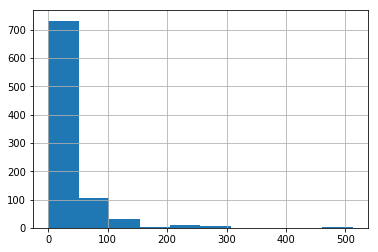

In [47]:
titanic['Fare'].hist();

There are no ticket prices within the 300 to 460 range. I'm keeping those bands however since this dataset is only of 891 people. There may be some who paid in that range.

The FareLabels column is purely to show what values fall under what label. I don't actually do anything with this.

In [66]:
titanic['FareLabels'] = pd.cut(titanic['Fare'], bins = 10)
titanic[['FareLabels', 'Survived']].groupby('FareLabels').mean()

,Survived
FareLabels,
"(-0.512, 51.233]",0.318306
"(51.233, 102.466]",0.660377
"(102.466, 153.699]",0.741935
"(153.699, 204.932]",1.000000
"(204.932, 256.165]",0.636364
"(256.165, 307.398]",0.666667
"(307.398, 358.63]",NaN
"(358.63, 409.863]",NaN
"(409.863, 461.096]",NaN


In [64]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
titanic['FareRange'] = pd.cut(titanic['Fare'], bins = 10, labels = labels)
titanic[['FareRange', 'Survived']].groupby('FareRange').mean()

,Survived
FareRange,
0,0.318306
1,0.660377
2,0.741935
3,1.000000
4,0.636364
5,0.666667
6,NaN
7,NaN
8,NaN


In [67]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FareRange,FareLabels
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7.2500,S,1,0,"(-0.512, 51.233]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,71.2833,C,1,1,"(51.233, 102.466]"
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,7.9250,S,0,0,"(-0.512, 51.233]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,53.1000,S,1,1,"(51.233, 102.466]"
5,0,3,"Allen, Mr. William Henry",0,3,0,0,8.0500,S,0,0,"(-0.512, 51.233]"


In [68]:
titanic['Fare'] = titanic['FareRange'].values

In [69]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FareRange,FareLabels
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,S,1,0,"(-0.512, 51.233]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,1,C,1,1,"(51.233, 102.466]"
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,0,S,0,0,"(-0.512, 51.233]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,1,S,1,1,"(51.233, 102.466]"
5,0,3,"Allen, Mr. William Henry",0,3,0,0,0,S,0,0,"(-0.512, 51.233]"


In [70]:
titanic = titanic.drop(['FareRange', 'FareLabels'], axis = 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,1,C,1
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,0,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,1,S,1
5,0,3,"Allen, Mr. William Henry",0,3,0,0,0,S,0
